# Convolution and Image Filtering

In image processing, convolutions is the basis of all linear filters. It is the very first step applied when we want to blur, sharpen or detect edges. And yes, it is the same convolution used in state-of-the-art neural networks. In this notebook, you will learn the concept behind convolution, the OpenCV function to implement convolution, and different types of filters.

---

### Why we would want to blur an image?

It turns out that blurring images is actually a very common operation in image processing and computer vision that's used as a pre-processing step to reduce the noise in an image.

In this example all this fine texture associated with the fur can actually be a distraction to some algorithms that might be trying to identify larger structures in the image (like the shape and location of eyes, etc).

It turns out that if we blur the image (as show over here to the right) it becomes much easier for algorithms to identify higher level structures in the image.

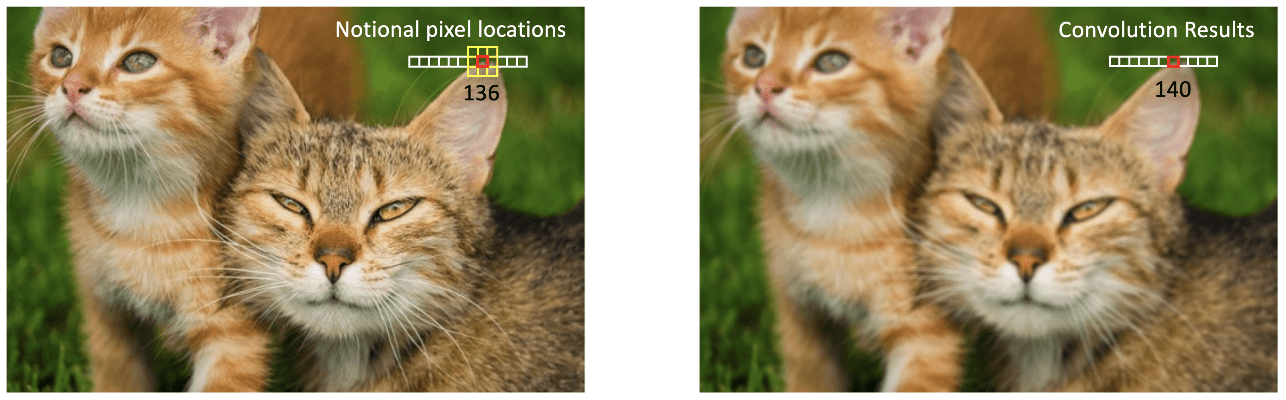
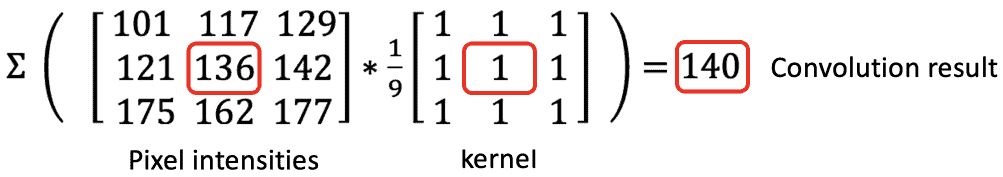

### Convolution

A convolution operation requires two inputs, the **input image** and a **kernel**. The input image can be either grayscale or color. For color images, convolution is performed independently on each channel. A convolution kernel is a 2D matrix that is used to filter images, also known as a **convolution matrix**. It is typically a square, MxN matrix, where both M and N are odd integers (e.g., 3x3, 5x5, 7x7, ...). The 3x3 kernel above is refered to as a Box kernel.

When we convolve an image with the kernel we're going to place the center of this kernel at every pixel location in the input image. At every pixel location we are going to place the kernel and perform the same mathematical operation.

We have a normalization factor in front of the kernel whose denominator is 9 which is the number of elements in the kernel. The reason for multiplying by this normalization factor is that we want the convolved results to be in the same intenisty range as the original image and because all the entries in the kernel are equal to 1. It has the effect of blurring image.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Convolution in OpenCV

In OpenCV, convolution is performed using the fuction **`filter2D()`**

---

<h1 style="font-size:30px;">Function Syntax</h1>

dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

+ **`dst`** output image of the same size and the same number of channels as src.

The functiion has **3 required input arguments**:

1. **`src`** input image.
2. **`ddepth`** desired depth of the destination image.
3. **`kernel`** convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.

---

### Define a Kernel

First, we need to define a kernel. For this exercise, let's use a kernel of 5X5. To keep things simple, we will also choose a kernel where all elements are the same. This kernel is also called a **Box Kernel**. Notice that when a kernel is written in matrix form as shown below we often pre-multiply the matrix by a normalizing factor (in this case 1/25). This makes it a little easier to read and understand the kernel.
$$\frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1\end{bmatrix}$$

In [4]:
kernel_size = 5
# Create a 5X5 kernel wil all elements equal to 1
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / kernel_size ** 2

print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


The above represents a normalized 5x5 kernel so that all values add up 1.

### Perform Convolution

Next, **`filter2D()`** is used to perform the convolution.

The second parameter (**`ddepth`**) is set to **`-1`**, which means the bit-depth of the output image is the same as the input image. So if the input image is of type **`uint8`**, the output image will also be of the same type.

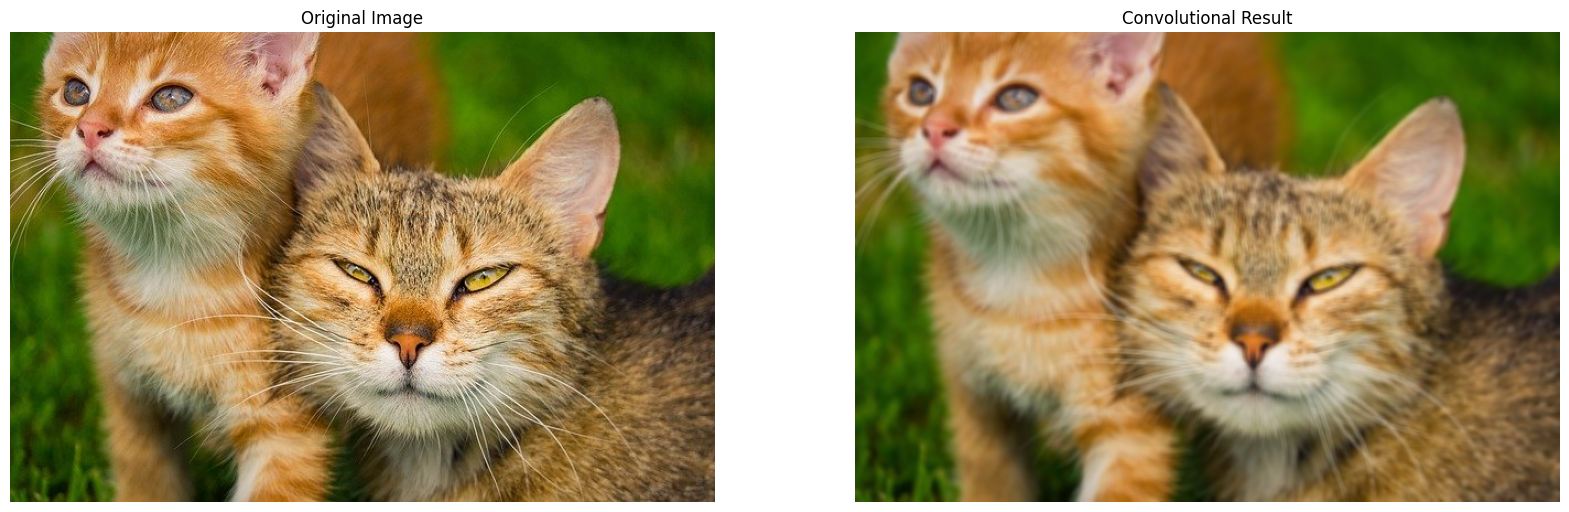

In [5]:
filename = "../00-module8/kitten.jpg"
image = cv2.imread(filename, cv2.IMREAD_COLOR)

dst = cv2.filter2D(image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(20, 10))
plt.subplot(121); plt.axis("off"); plt.imshow(image[:, :, ::-1]); plt.title("Original Image")
plt.subplot(122); plt.axis("off"); plt.imshow(dst[:, :, ::-1]); plt.title("Convolutional Result");

### Box Blur

It turns out that blurring is such a common operation that in OpenCV there's actually a box blur function.

In the previous example, we saw how to create a smoothing filter by convolving the image with a 5X5 kernel.

### Box Blur in OpenCV
---
dst = cv2.blur(src, ksize[, dst[, anchor[, borderType]]])

**`dst`** output image of the same size and type as src

The function has **2 required arguments**:

1. **`src`** input image; it can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F/
2. **`ksize`** blurrring kernel size.

Here, the blur functioin assumes the kernel is a normalized box kernel.

---

As expected, the larger kernel produces more blurring and the reason for that is that we're averaging over a larger spatian region within the original image to produce the filtered result.

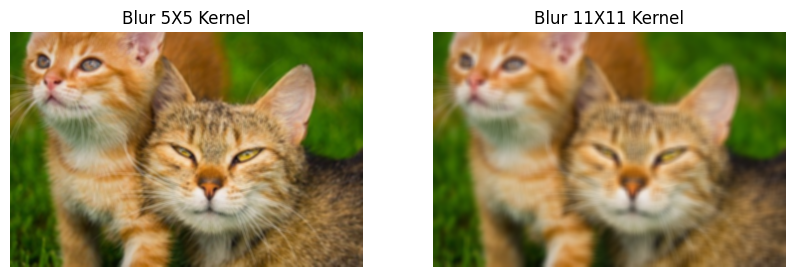

In [6]:
# Apply a box filter - kernel size 5.
box_blur1 = cv2.blur(image, (5, 5))

# Apply a box filter - kernel size 11.
box_blur2 = cv2.blur(image, (11, 11))

# Display.
plt.figure(figsize=(10, 10))
plt.subplot(121); plt.axis("off"); plt.imshow(box_blur1[:, :, ::-1]); plt.title("Blur 5X5 Kernel")
plt.subplot(122); plt.axis("off"); plt.imshow(box_blur2[:, :, ::-1]); plt.title("Blur 11X11 Kernel");

### Gaussian Blur

Unlike the box kernel, the Gaussian kernel is not uniform. The middle pixel gets the maximum weight while the pixels farther away are given less weight. A Gaussian Blur kernel weights the contribution of a neighboring pixel based on a Gaussian distribution. The Gaussian 5X5 kernel  shown below is an approximation to the 2D Gaussian distribution with ${\sigma}=1$. A large value of ${\sigma}$ would add more weight to the edges of the kernel and therefore have a stronger blurring effect, while a smaller value of ${\sigma}$ would narrow the blurring effect. The size of the kernel also determines the amount of blurring. A large kernel (with the same value of sigma) will blur the image more than a smaller kernel.

---

As you move radially from the center pixel the values get progressively smaller.

This is still going to have a blurring effect like the box kernel, but with much less influence from the pixels that are further away from the center pixel.

The normalizing fator has a denominator of 273 which is the sum of all the elements in this kernel.

The numbers in this kernel are derived as an approximation to a symetric 2D Gaussian function (right figure) where the peak of the function corresponds to the weight fo the center kernel, and then moving out from there the values get progressively less.

The shape of this function is controlled by a parameter callled sigma which is the standard deviation of the function and describes how broad or narrow this peak is.

This particular function is plotted with a sigma value of 1, but for any given size kernel you can select different values of sigma to achieve varying degrees of blurring and in general a gaussian blur will provide a more natural smoothing effect than a box blur, is one reason why gaussian blurring is frequently used in computer vision.

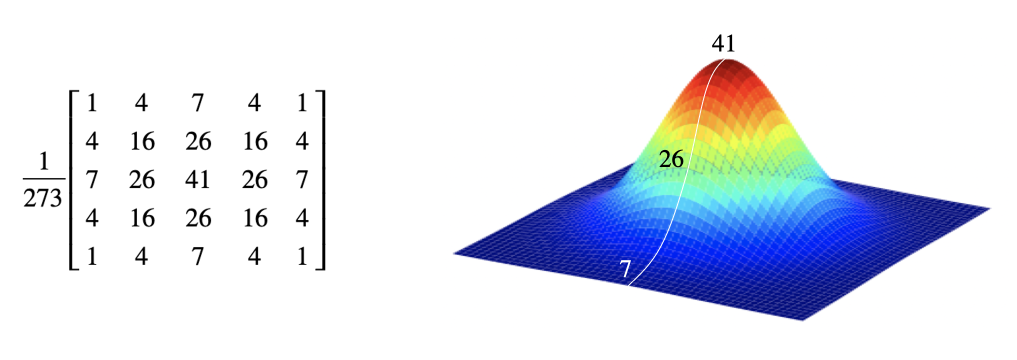

### Gaussian Blur in OpenCV
---
#### Function Syntax

dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

**`dst`** output image of the same size and type as src.

The function has **3 required input arguments**:

1. **`src`** input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
2. **`ksize`** Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.
3. **`sigmaX`** Gaussian kernel standard deviation in X direction.

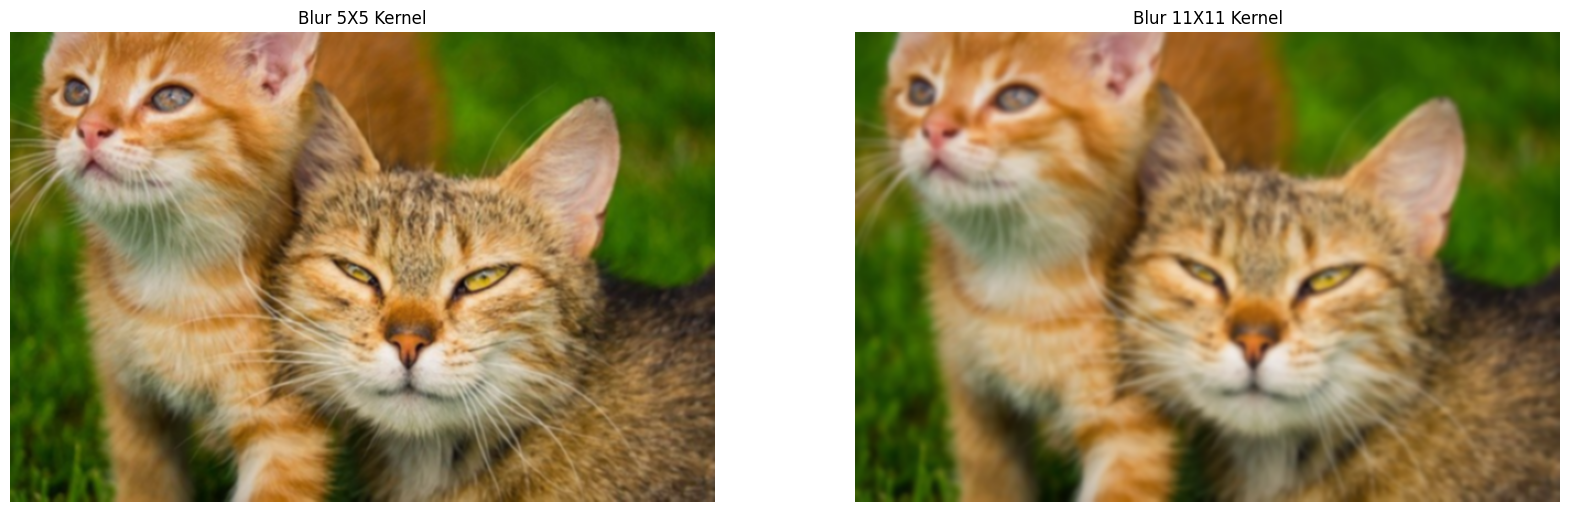

In [7]:
# Gaussian blur adn effect of kernel size
# Apply Gaussian blur.
gaussian_blur1 = cv2.GaussianBlur(image, (5, 5), 0, 0)
gaussian_blur2 = cv2.GaussianBlur(image, (11, 11), 0, 0)

# Display.
plt.figure(figsize=(20, 8))
plt.subplot(121); plt.axis("off"); plt.imshow(gaussian_blur1[:, :, ::-1]); plt.title("Blur 5X5 Kernel")
plt.subplot(122); plt.axis("off"); plt.imshow(gaussian_blur2[:, :, ::-1]); plt.title("Blur 11X11 Kernel");

### Comparing Box and Gaussian Blur

The degree of blurring is much less than the box kernel and that's because the box kernel is applying equal weight to every single element in the kernel, whereas in the gaussian case the weighting is falling off much more dramatically from the center of the kernel so the effect is much more subtle.

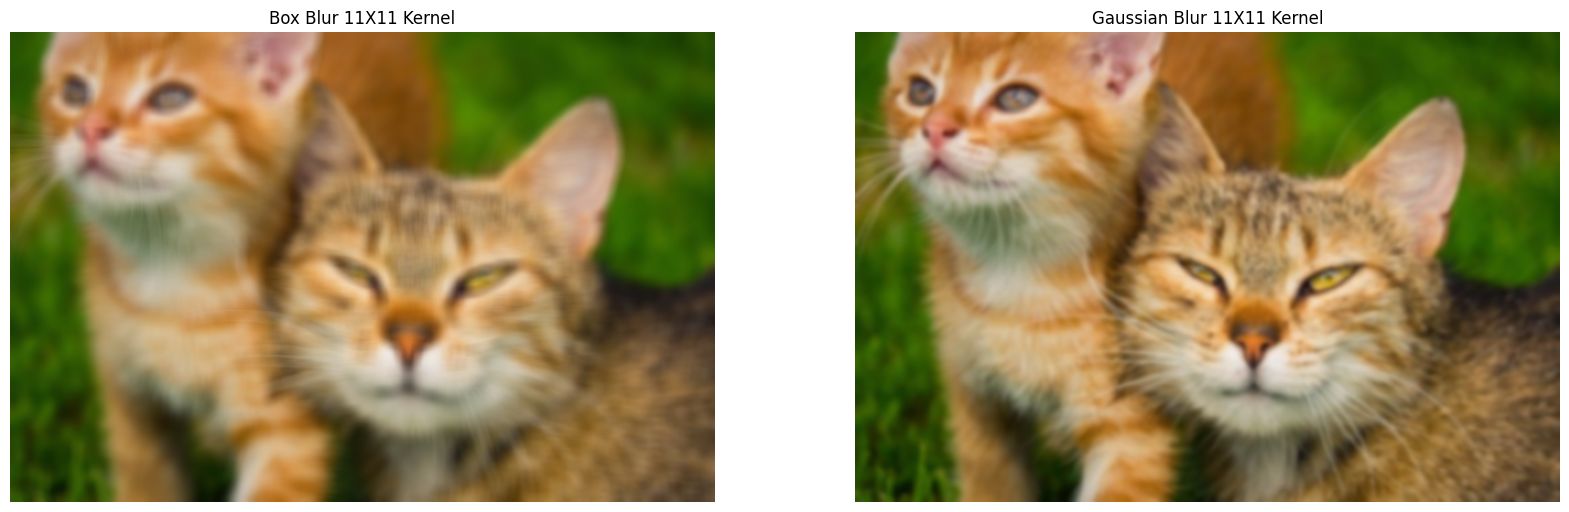

In [8]:
plt.figure(figsize=(20, 8))
plt.subplot(121); plt.axis("off"); plt.imshow(box_blur2[:, :, ::-1]); plt.title("Box Blur 11X11 Kernel")
plt.subplot(122); plt.axis("off"); plt.imshow(gaussian_blur2[:, :, ::-1]); plt.title("Gaussian Blur 11X11 Kernel");

### Gaussian Blur and effect of sigma

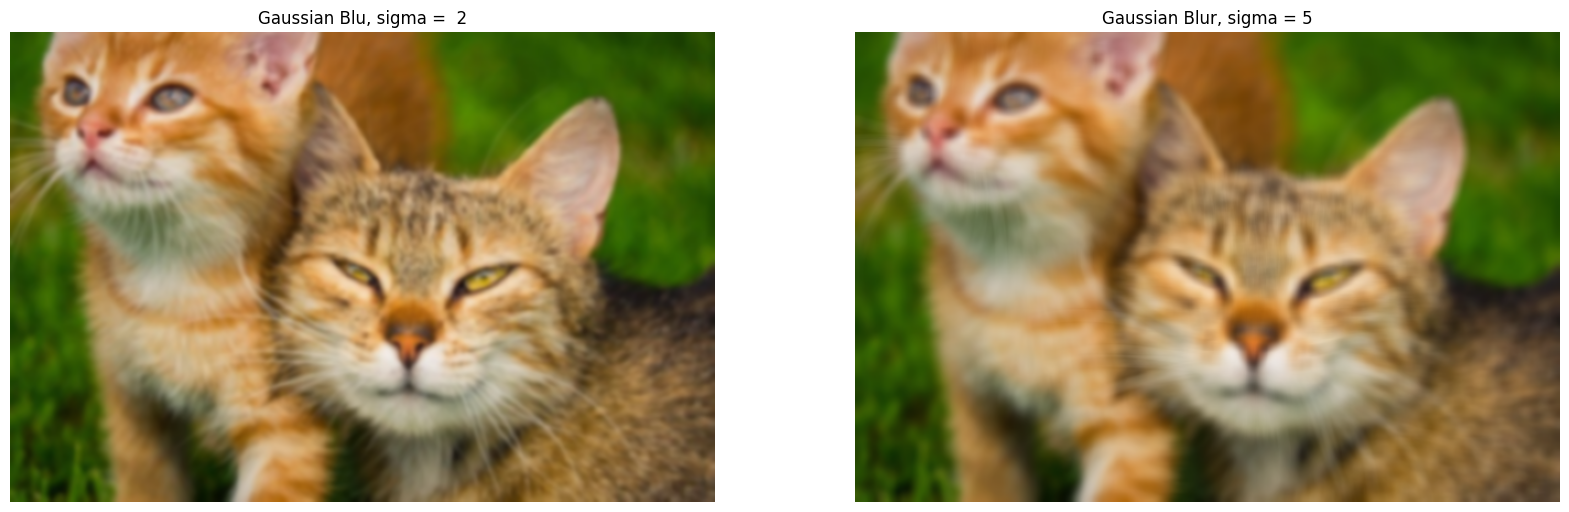

In [9]:
# Specifying sigmax = 0 and sigmay = 0, will compute a sigma of 2 for a 11x11 kernel
gaussian_blur3 = cv2.GaussianBlur(image, (11, 11), 0, 0)

# Here we are explicitysetting the sigma values to be very large.
gaussian_blur4 = cv2.GaussianBlur(image, (11, 11), 5, 5)

# Display.
plt.figure(figsize=(20, 8))
plt.subplot(121); plt.axis("off"); plt.imshow(gaussian_blur3[:, :, ::-1]); plt.title("Gaussian Blu, sigma =  2")
plt.subplot(122); plt.axis("off"); plt.imshow(gaussian_blur4[:, :, ::-1]); plt.title("Gaussian Blur, sigma = 5");

### Image Sharpengin

Sharpening is not used as often as blurring and computer vision, but it certainly has it applications. We can sharpen an image with the following 2D-convolution kernel.

---


The kernel shown here is known as the sharpening kernel, there isn't specific function in OpenCV for sharpening, but we can simply use the filter2D() function

$$
\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}
$$

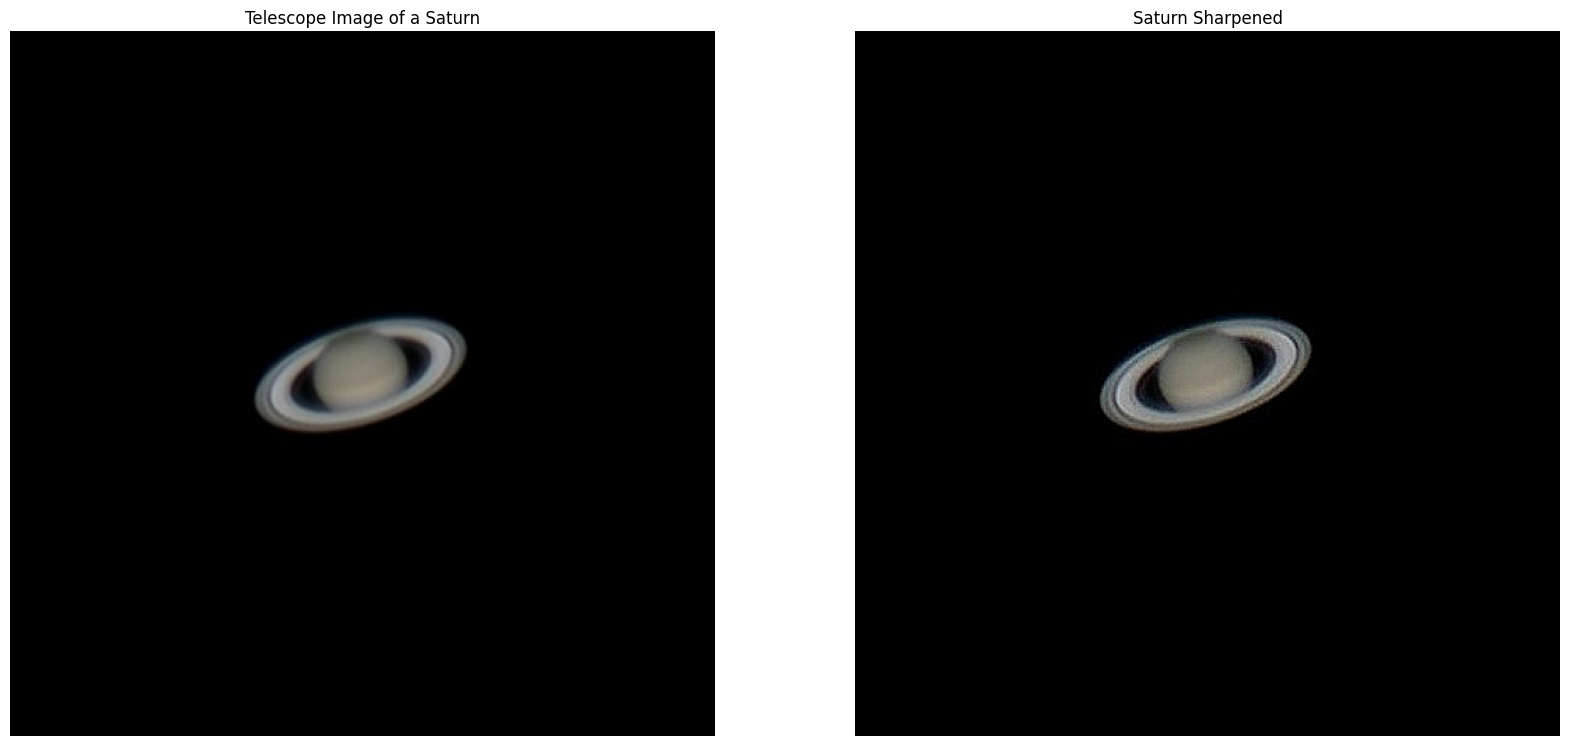

In [12]:
saturn = cv2.imread("../00-module8/saturn.jpg", cv2.IMREAD_COLOR)

# Define a sharpening kernel.
kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]
)
saturn_sharp = cv2.filter2D(saturn, ddepth=-1, kernel=kernel)

plt.figure(figsize=(20, 15))
plt.subplot(121); plt.axis("off"); plt.imshow(saturn[:, :, ::-1]); plt.title("Telescope Image of a Saturn");
plt.subplot(122); plt.axis("off"); plt.imshow(saturn_sharp[:, :, ::-1]); plt.title("Saturn Sharpened");

### Recovering Sharpness from Gaussian Blur

One property of these sharpening kernels is that the center value needs to be one more than the absolute value of the sum of these other elements.

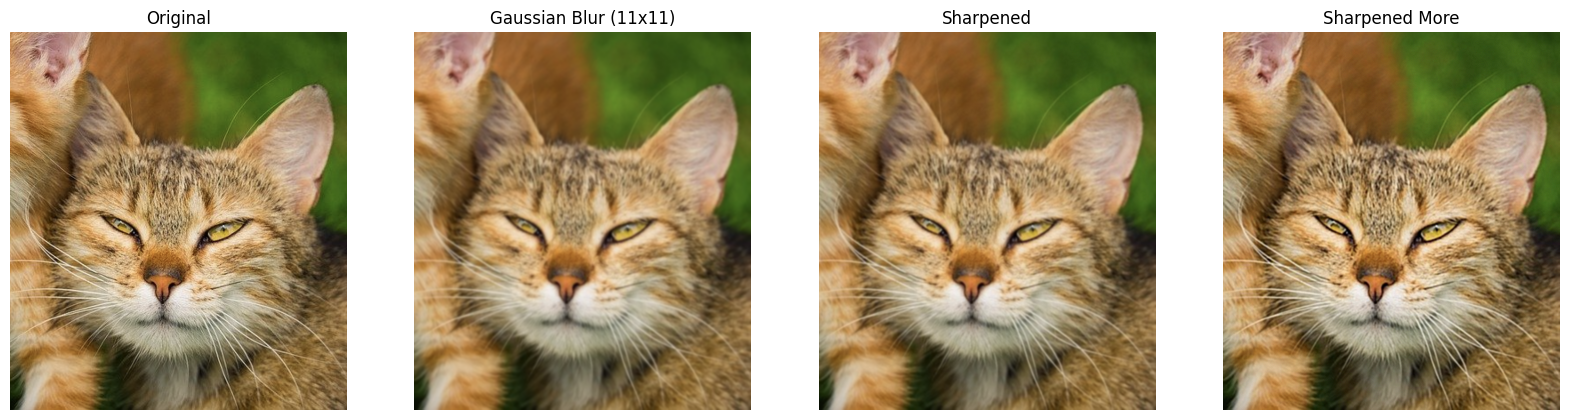

In [14]:
image = cv2.imread("../00-module8/kitten_zoom.png", cv2.IMREAD_COLOR)

gaussian_blur = cv2.GaussianBlur(image, (11, 11), 0, 0)

# Sharpening kernel.
kernel1 = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]
)

# More extreme sharpening kernel.
kernel2 = np.array(
    [
        [0, -4, 0],
        [-4, 17, -4],
        [0, -4, 0]
    ]
)

# Apply sharpening.
image_sharp1 = cv2.filter2D(gaussian_blur, ddepth=-1, kernel=kernel1)
iamge_shaep2 = cv2.filter2D(gaussian_blur, ddepth=-1, kernel=kernel2)

# Display.
plt.figure(figsize=(20, 10))
plt.subplot(141); plt.axis("off"); plt.imshow(image[:, :, ::-1]); plt.title("Original")
plt.subplot(142); plt.axis("off"); plt.imshow(gaussian_blur[:, :, ::-1]); plt.title("Gaussian Blur (11x11)")
plt.subplot(143); plt.axis("off"); plt.imshow(image_sharp1[:, :, ::-1]); plt.title("Sharpened");
plt.subplot(144); plt.axis("off"); plt.imshow(iamge_shaep2[:, :, ::-1]); plt.title("Sharpened More");
